In [ ]:
### 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pokemon.csv")

In [16]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Distribution of Pokemon Types

df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', figsize=(10, 8))

In [ ]:
# Distribution of Pokemon Totals
df['Total'].plot(kind='hist', figsize=(10, 8))

In [ ]:
# 
df['Total'].plot(kind='box', vert=False, figsize=(10, 5))

In [ ]:
# Dist of Legendary Pokemon
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

# Basic Filtering

### 1. How many Pokemons exist with an Attack value greater than 150?

In [ ]:
sns.boxplot(data=df, x='Attack')

In [ ]:
df.loc[df['Attack'] > 150]

In [ ]:
# Try your code here
df.loc[df['Attack'] > 150].shape

### 2. Select all pokemons with a Speed of 10 or less

In [ ]:
df.loc[df['Speed'] <= 10]

### 3. How many Pokemons have a Sp. Def value of 25 or less? 

In [ ]:
df.loc[df['Sp. Def'] <= 25].shape

In [10]:
(df['Sp. Def'] <= 25).sum()

18

### 4. Select all the legendary pokemons

In [ ]:
legendary_df = df.loc[df['Legendary'] == True]
legendary_df

### 5. Find the outlier

Take a look at the scatterplot that correlates pokemons Attack and Defense. What's the Name of the pokemon that is a clear outlier (strong Defense, but very low Attack).

In [ ]:
ax = sns.scatterplot(data=df, x="Defense", y="Attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [ ]:
df.loc[(df['Attack'] < 25) & (df['Defense'] > 200)]

In [3]:
# sort elements so that items 
# with highest defense and lowest attack show up first
df.sort_values(by=['Defense','Attack'], ascending=[False, True]).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


#### 6. How many Fire-Flying Pokemons are there?

In [13]:
df.loc[(df['Type 1'] == 'Fire') & (df['Type 2'] == 'Flying')].shape

(6, 13)

In [16]:
(df['Type 1'] == 'Fire').sum()

52

In [17]:
(df['Type 2'] == 'Flying').sum()

97

In [19]:
((df['Type 1'] == 'Fire') & (df['Type 2'] == 'Flying')).sum()

6

#### 7. How many 'Poison' pokemons are across both types?

In [4]:
((df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')).sum()

62

#### 8. Name the pokemon of Type 1 Ice which has the strongest defense?

In [6]:
highest_ice_def = df.loc[df['Type 1'] == 'Ice','Defense'].max()
highest_ice_def

184

In [8]:
df.loc[(df['Type 1'] == 'Ice') & (df['Defense'] == highest_ice_def)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


#### 9. What is the most common type of Legendary Pokemons?

<Axes: xlabel='Type 1'>

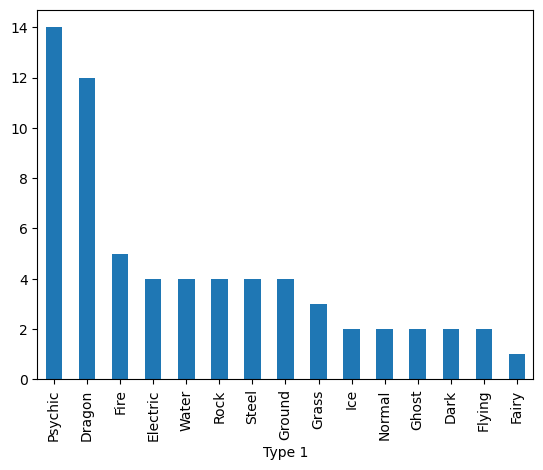

In [15]:
df.loc[df['Legendary'], 'Type 1'].value_counts().plot(kind='bar')

#### What's the most powerful pokemon from the first 3 generations, of type water?

In [29]:
generation123 = (df['Generation'] == 1) | (df['Generation'] == 2) | (df['Generation'] == 3)

In [40]:
g123 = df['Generation'].isin([1,2,3])

df.loc[
    (df['Type 1'] == 'Water')
    & g123
].sort_values(by='Total', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
293,270,Lotad,Water,Grass,220,40,30,30,40,50,30,3,False
209,194,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False


#### What's the most powerful dragon from the last 2 generations?

In [6]:
"""
Find the most powerful pokemon (by Total)
that is of type Dragon (either Type 1 or Type 2) 
and from the last two generations. 

Enter its name below. 

If there are multiple, enter the name of the Dragon with higher index value.

"""

g45 = df['Generation'].isin([4,5])

dragon = (df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon')

df.loc[dragon & g45].sort_values(by='Total', ascending=False).sort_values(by='#', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
695,634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,False
694,633,Deino,Dark,Dragon,300,52,65,50,45,50,38,5,False
682,621,Druddigon,Dragon,NaN,485,77,120,90,60,90,48,5,False
673,612,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False


#### 12. Select most powerful Fire-type pokemons

In [18]:
fire = df['Type 1'] == 'Fire'
powerful = df['Attack'] > 100

powerful_fire_df = df.loc[(fire == True) & (powerful == True)]
powerful_fire_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


#### 13. Select all Water-type, Flying-type pokemons

In [4]:
water = df['Type 1'] == 'Water'
flying = df['Type 2'] == 'Flying'

water_flying_df = df.loc[(water == True) & (flying == True)]
water_flying_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
641,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
642,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


#### 14. Select specific columns of Legendary pokemons of type Fire

In [4]:
legendary_df = df['Legendary']
fire = df['Type 1'] == 'Fire'

# Try your code here
legendary_fire_df = df.loc[
    ((legendary_df == True) & (fire == True))
    , 
    ['Name','Attack','Generation']
]
legendary_fire_df

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6


#### 15. Select Slow and Fast Pokemons

This is the distribution of speed of the pokemons. The red lines indicate those bottom 5% and top 5% pokemons by speed:

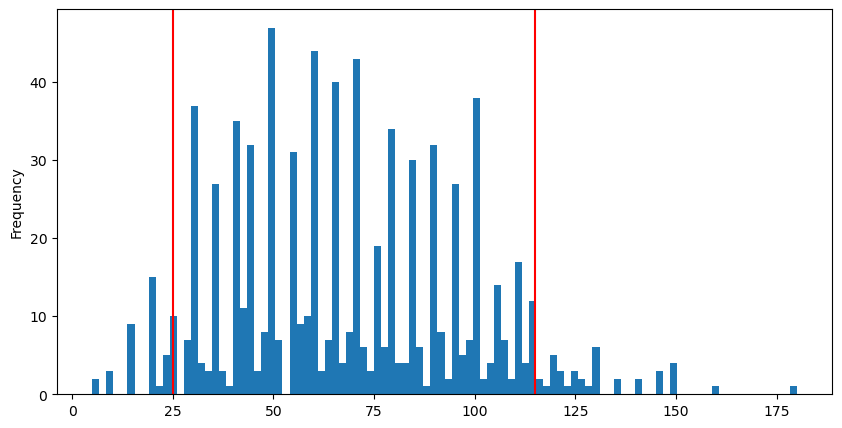

In [3]:
ax = df['Speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

In [9]:
# slow pokemon
bottom_5 = df['Speed'].quantile(.05)

# fast pokemon
top_5 = df['Speed'].quantile(.95) 

(bottom_5, top_5)

(25.0, 115.0)

In [19]:
# select pokemon with speed below bottom 5%
# and above top 95%
slow_pkmn = df['Speed'] < bottom_5
#slow_pkmn

fast_pkmn = df['Speed'] > top_5
#fast_pkmn 

slow_fast_df = df.loc[slow_pkmn | fast_pkmn]
slow_fast_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
752,682,Spritzee,Fairy,NaN,341,78,52,60,63,65,23,6,False
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False


#### 16. Find the Ultra Powerful Legendary Pokemon

Text(160, 150, "Who's this guy?")

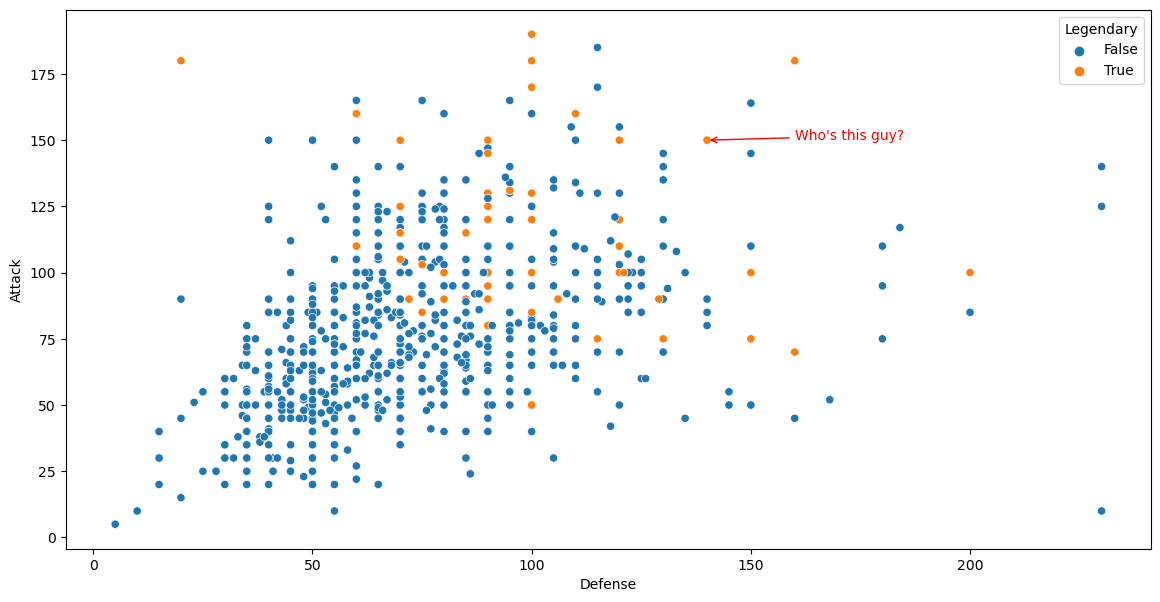

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue='Legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(140, 150), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [22]:


df.loc[
    (df['Attack'] == 150) & 
    (df['Defense'] == 140) &
    (df['Legendary'] == True)
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
423,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True
